<a href="https://colab.research.google.com/github/shobhitsundriyal/Revisit_ML/blob/master/FFNetwork_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
import time
import seaborn as sns
from tqdm import tqdm_notebook
from IPython.display import HTML 
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
import matplotlib.colors

import torch

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
torch.manual_seed(7)
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list('', ['red', 'yellow','green'])

Generate dataset

In [3]:
data, labels = make_blobs(1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


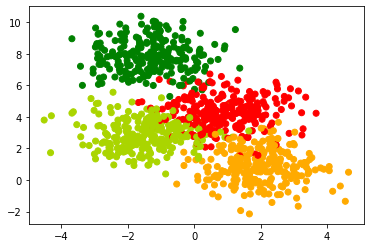

In [4]:
plt.scatter(data[:, 0], data[:, 1], cmap=my_cmap, c=labels)

In [5]:
X_train, X_val, y_train, y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(750, 2) (250, 2) (750,) (250,)


Torch tensors and autograd

In [6]:
X_train, X_val, y_train, y_val = map(torch.tensor, (X_train, X_val, y_train, y_val))
print(X_train.shape, y_train.shape)

torch.Size([750, 2]) torch.Size([750])




```
-5:18 -> full size exp
```


In [0]:
def model(x):
  a1 = torch.matmul(x, weights1) + bias1
  h1 = a1.sigmoid()
  a2 = torch.matmul(h1, weights2) + bias2
  h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
  return h2

c[22] -04;12

In [0]:
def loss_fn(y_hat, y):
  return -(y_hat[range(y.shape[0]), y].log()).mean()

In [0]:
def accuracy(y_hat, y):
  pred = torch.argmax(y_hat, dim=1)
  return (pred==y).float().mean()

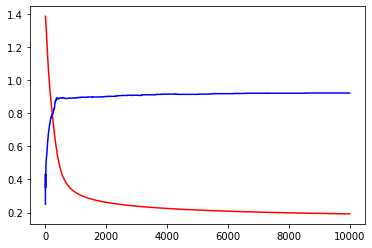

Initial Loss 1.3844554424285889
Final Loss 0.19203224778175354
Initial Acc 0.25066667795181274
Final Acc 0.9213333129882812


In [19]:
torch.manual_seed(0)
weights1 = torch.rand(2,2) / math.sqrt(2)
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)

weights2 = torch.rand(2,4) / math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)

learning_rate = 0.2
epochs = 10000

X_train = X_train.float()
y_train = y_train.long()

loss_arr = []
acc_arr = []

for epoch in range(epochs):
  y_hat = model(X_train)
  loss = loss_fn(y_hat, y_train)
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat, y_train))

  with torch.no_grad():
    weights1 -= weights1.grad * learning_rate
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad * learning_rate
    bias2 -= bias2.grad * learning_rate

    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()

plt.plot(loss_arr, 'r')
plt.plot(acc_arr, 'b')
plt.show()
print(f'Initial Loss {loss_arr[0]}\nFinal Loss {loss_arr[-1]}')
print(f'Initial Acc {acc_arr[0]}\nFinal Acc {acc_arr[-1]}')

#### Same Using pytorch nn.functional

##### Loss

In [0]:
import torch.nn.functional as F

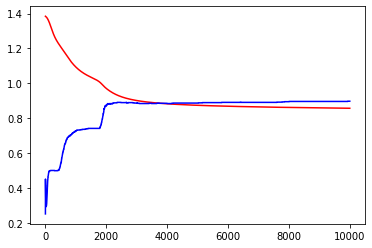

Initial Loss 1.3848539590835571
Final Loss 0.8568850755691528
Initial Acc 0.25066667795181274
Final Acc 0.8973333239555359


In [22]:
torch.manual_seed(0)
weights1 = torch.rand(2,2) / math.sqrt(2)
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)

weights2 = torch.rand(2,4) / math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)

learning_rate = 0.2
epochs = 10000

X_train = X_train.float()
y_train = y_train.long()

loss_arr = []
acc_arr = []

for epoch in range(epochs):
  y_hat = model(X_train)
  loss = F.cross_entropy(y_hat, y_train)##########
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat, y_train))

  with torch.no_grad():
    weights1 -= weights1.grad * learning_rate
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad * learning_rate
    bias2 -= bias2.grad * learning_rate

    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()

plt.plot(loss_arr, 'r')
plt.plot(acc_arr, 'b')
plt.show()
print(f'Initial Loss {loss_arr[0]}\nFinal Loss {loss_arr[-1]}')
print(f'Initial Acc {acc_arr[0]}\nFinal Acc {acc_arr[-1]}')

##### nn.parameter

In [0]:
import torch.nn as nn

In [0]:
class FNN(nn.Module):

  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.weights1 = nn.Parameter(torch.randn(2,2) / math.sqrt(2))
    self.bias1 = nn.Parameter(torch.zeros(2))
    self.weights2 = nn.Parameter(torch.randn(2,4) / math.sqrt(2))
    self.bias2 = nn.Parameter(torch.zeros(4))

  def forward(self, X):
    a1 = torch.matmul(X, self.weights1) + self.bias1
    h1 = a1.sigmoid()
    a2 = torch.matmul(h1, self.weights2) + self.bias2
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    return h2

In [0]:
fn = FNN()

In [0]:
def fit(epochs=10000, learning_rate=0.2):
  loss_arr = []
  acc_arr = []

  for epoch in range(epochs):
    y_hat = fn(X_train)
    loss = F.cross_entropy(y_hat, y_train)
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, y_train))

    loss.backward()# takes grad
    # update prams
    with torch.no_grad():
      for param in fn.parameters():
        param -= param.grad * learning_rate
      fn.zero_grad()

  plt.plot(loss_arr, 'r')
  plt.plot(acc_arr, 'b')
  plt.show()
  print(f'Initial Loss {loss_arr[0]}\nFinal Loss {loss_arr[-1]}')
  print(f'Initial Acc {acc_arr[0]}\nFinal Acc {acc_arr[-1]}')

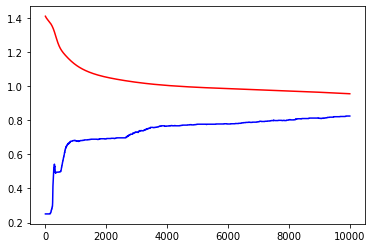

Initial Loss 1.4111980199813843
Final Loss 0.9561843276023865
Initial Acc 0.25066667795181274
Final Acc 0.8253333568572998


In [71]:
fit()

##### Using nn.Linear and optim

In [0]:
class FNN_v1(nn.Module):

  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.lin1 = nn.Linear(2,2)
    self.lin2 = nn.Linear(2,4)

  def forward(self, X):
    a1 = self.lin1(X)
    h1 = a1.sigmoid()
    a2 = self.lin2(h1)
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    return h2

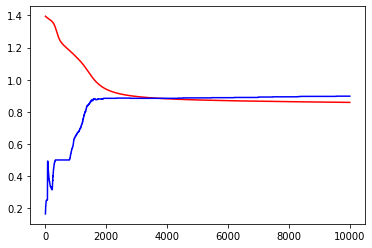

Initial Loss 1.395160436630249
Final Loss 0.8586323261260986
Initial Acc 0.164000004529953
Final Acc 0.8973333239555359


In [78]:
fn = FNN_v1()
fit()

In [0]:
from torch import optim

In [0]:
def fit_v1(epochs=10000, learning_rate=0.2):
  loss_arr = []
  acc_arr = []
  opt = optim.SGD(fn.parameters(), lr=learning_rate)

  for epoch in range(epochs):
    y_hat = fn(X_train)
    loss = F.cross_entropy(y_hat, y_train)
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, y_train))

    loss.backward()
    opt.step()
    opt.zero_grad()

  plt.plot(loss_arr, 'r')
  plt.plot(acc_arr, 'b')
  plt.show()
  print(f'Initial Loss {loss_arr[0]}\nFinal Loss {loss_arr[-1]}')
  print(f'Initial Acc {acc_arr[0]}\nFinal Acc {acc_arr[-1]}')

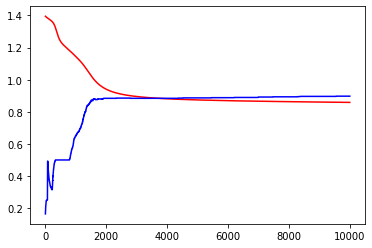

Initial Loss 1.395160436630249
Final Loss 0.8586323857307434
Initial Acc 0.164000004529953
Final Acc 0.8973333239555359


In [83]:
fn = FNN_v1()
fit_v1()

##### Using nn.Sequential

In [0]:
class FNN_v2(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)

    self.net = nn.Sequential(
        nn.Linear(2,2),
        nn.Sigmoid(),
        nn.Linear(2,4),
        nn.Softmax()
    )

  def forward(self, X):
    return self.net(X)

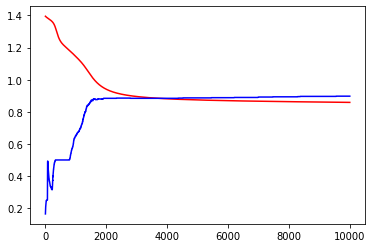

Initial Loss 1.395160436630249
Final Loss 0.8586323857307434
Initial Acc 0.164000004529953
Final Acc 0.8973333239555359


In [92]:
fn = FNN_v2()
fit_v1()

In [0]:
def fit_v2(x, y, model, opt, loss_fn, epochs=10000):
  for epoch in range(epochs):
    loss = loss_fn(model(x), y)
    acc = accuracy(model(x), y)

    loss.backward()
    opt.step()
    opt.zero_grad()

  return loss.item(), acc.item()

In [100]:
fn = FNN_v2()
loss_fun = F.cross_entropy
opt = optim.SGD(fn.parameters(), lr=0.2)
fit_v2(X_train, y_train, fn, opt, loss_fun)

(0.8586323857307434, 0.8973333239555359)

final loss, final acc ↑

In [108]:
device = torch.device('cpu')

X_train = X_train.to(device)
y_train = y_train.to(device)

fn = FNN_v2()
opt = optim.SGD(fn.parameters(), lr=0.2)
fn.to(device)
tic = time.time()
print('Final loss and acc: ', fit_v2(X_train, y_train, fn, opt, loss_fun))
toc = time.time()
print('Time Taken = ', toc-tic)

Final loss and acc:  (0.8586323857307434, 0.8973333239555359)
Time Taken =  15.572141170501709


In [110]:
device = torch.device('cuda')

X_train = X_train.to(device)
y_train = y_train.to(device)

fn = FNN_v2()
opt = optim.SGD(fn.parameters(), lr=0.2)
fn.to(device)
tic = time.time()
print('Final loss and acc: ', fit_v2(X_train, y_train, fn, opt, loss_fun))
toc = time.time()
print('Time Taken = ', toc-tic)

Final loss and acc:  (0.8586326241493225, 0.8973333239555359)
Time Taken =  10.394598007202148
